In [35]:
import requests
from bs4 import BeautifulSoup
import time
import random
import re

headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36',
}

# 建立各項清單
News_Link = []
News_Title = []
News_Type = []
News_Date = []
News_Time = []
News_Content = []
News_ID = []

start_time = time.time()

# 爬取新聞網頁資訊，只爬前200頁
for i in range(1,201):
    url = 'https://www.ettoday.net/news_search/doSearch.php?keywords=鳳梨&idx=1&page=' + str(i)
    res = requests.get(url=url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    
    for j in range(0, len(soup.select('div[class=box_2]'))):
        try:
            # 取新聞標題
            title = soup.select('div[class=box_2]')[j].select('h2 a')[0].text
            News_Title.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', title))
            print(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', title))
            
            # 取網址
            link = soup.select('div[class=box_2]')[j].select('h2 a')[0]["href"]
            News_Link.append(link)
            print(link)
            
            # 建立ID
            news_id = soup.select('div[class=box_2]')[j].select('h2 a')[0]["href"].split('/')[5].split('.')[0]
            News_ID.append(news_id)
            print(news_id)
            
            # 取新聞類型
            news_type = soup.select('div[class=box_2]')[j].select('span[class=date]')[0].text.split()[0]
            News_Type.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_type))
#             print(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_type))
            
            # 取發布日期
            news_date = soup.select('div[class=box_2]')[j].select('span[class=date]')[0].text.split()[2]
            News_Date.append(news_date)
#             print(news_date)
            
            # 取發布時間
            news_time = soup.select('div[class=box_2]')[j].select('span[class=date]')[0].text.split()[3]
            News_Time.append(re.sub('[-_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_time))
#             print(re.sub('[-_、【】。；：)(「」，.&+\n\t\r\u3000]', '', news_time))
            
            # 取新聞內容
            page_res = requests.get(url=link, headers=headers)
            page_soap = BeautifulSoup(page_res.text, 'html.parser')

            for content in page_soap.select('div[class="story"]'):
                try:
                    News_Content.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', ' ', content.text))
                except:
                    pass
            for content in page_soap.select('div[class="story lazyload"]'):
                try:
                    News_Content.append(re.sub('[-:_、【】。；：)(「」，.&+\n\t\r\u3000]', ' ', content.text))
                except:
                    pass
            
        except:
            pass
        
        sleep_time = random.randint(5,10)
        print("sleep time: %s sec"%(sleep_time))
        print('==========')
        time.sleep(sleep_time)
        
print("--- spend %s seconds ---" % (time.time() - start_time))
print('共爬取' + str(len(News_Title)) + '則新聞')

京城銀行捐25萬助快篩力挺藝文團體健康回歸舞台
https://www.ettoday.net/news/20210804/2048097.htm
2048097
sleep time: 7 sec
摩斯父親節加8元多1杯！新推APP座位點餐服務優惠懶人包
https://www.ettoday.net/news/20210804/2047989.htm
2047989
sleep time: 5 sec
屏東候船室化身看海美術館首檔特展看14米高怪獸氣球
https://www.ettoday.net/news/20210803/2045910.htm
2045910
sleep time: 7 sec
疫情時代的居家靠山！中元普渡用泰山款待與好兄弟的距離讓人好安心
https://www.ettoday.net/news/20210803/2040460.htm
2040460
sleep time: 8 sec
全麥不是最瘦！5款吐司熱量營養師一圖揭密驚像在大口吃油
https://www.ettoday.net/news/20210803/2044194.htm
2044194
sleep time: 8 sec
Weeekly智阭回歸前夕突宣布中斷活動！公司證實心理因素影響
https://www.ettoday.net/news/20210802/2046334.htm
2046334
sleep time: 5 sec
加油國手被指辱華！小S丟代言無奈回應了先讓我靜一靜
https://www.ettoday.net/news/20210802/2046366.htm
2046366
sleep time: 8 sec
只有戴資穎摘牌請飲料！鳳梨挨批不公平…高EQ回應被推爆
https://www.ettoday.net/news/20210802/2046335.htm
2046335
sleep time: 7 sec
戴資穎奪銀！魏如萱醒來不甘心暖心安慰每個提起都需要放下
https://www.ettoday.net/news/20210802/2046265.htm
2046265
sleep time: 8 sec
郝龍斌聯手楊志良提行政訴訟聲請停止高端疫苗緊急授權
https://www.ettoday.net/news/20210802

sleep time: 6 sec
《怪奇物語》米莉被爆交往網紅！性事細節遭公開…氣炸喊告
https://www.ettoday.net/news/20210717/2033340.htm
2033340
sleep time: 8 sec
鳳梨護愛7個月見家長！女友超狂職業曝私下個性萌爆吸5萬人追蹤
https://www.ettoday.net/news/20210717/2033295.htm
2033295
sleep time: 6 sec
鳳梨放閃認愛長腿女友！女方超正臉蛋曝光…IG私照大尺度辣翻
https://www.ettoday.net/news/20210717/2033272.htm
2033272
sleep time: 10 sec
蔡阿嘎盤點2021年常用簡稱！估咩澳打網看傻需要翻譯機
https://www.ettoday.net/news/20210717/2032861.htm
2032861
sleep time: 10 sec
鳳梨惹怒杜汶澤逮季大條了台腔飆國罵64秒火爆片曝光！
https://www.ettoday.net/news/20210716/2032823.htm
2032823
sleep time: 6 sec
不忍金鑽鳳梨滯銷！5天賣萬顆彰化鳳梨仙子陳幸滿暖舉感動
https://www.ettoday.net/news/20210716/2032788.htm
2032788
sleep time: 9 sec
警抓賊破電動鐵馬竊盜她帶這個東西上派出所警全嚇壞
https://www.ettoday.net/news/20210716/2032388.htm
2032388
sleep time: 7 sec
保健食品怎麼吃？營養師吃對時間很重要
https://www.ettoday.net/news/20210716/2026050.htm
2026050
sleep time: 9 sec
麥當勞聯名《哆啦A夢》！百寶袋裝搖搖薯條芋頭冰炫風也太Q
https://www.ettoday.net/news/20210715/2031764.htm
2031764
sleep time: 6 sec
翁立友神隱N天近況曝光！對決雞排妹隔半年…二度攻蛋慘遭延
https://www.ettoday.ne

洗澡帶水果！孟耿如爆尪私下怪僻真相黃子佼尬笑有必要講嗎
https://www.ettoday.net/news/20210703/2021695.htm
2021695
sleep time: 9 sec
艾力克斯低調回美國！PO 3代同堂合照1年半沒看到爸了離台原因曝
https://www.ettoday.net/news/20210703/2021648.htm
2021648
sleep time: 10 sec
賈永婕大女兒訂100便當出大包了！晚上才認錯…她提唯一要求這是人品
https://www.ettoday.net/news/20210703/2021634.htm
2021634
sleep time: 8 sec
VICTON韓勝宇入伍前視訊粉絲列出美食清單好想去台灣！
https://www.ettoday.net/news/20210702/2021440.htm
2021440
sleep time: 5 sec
蒸籠甜點太可愛！永和復古咖啡廳脆皮可麗露甜蜜清爽超欠吃
https://www.ettoday.net/news/20210702/2009667.htm
2009667
sleep time: 8 sec
徐若瑄舒淇林依晨33大咖力挺！黃裕翔《與你同行》致敬醫護
https://www.ettoday.net/news/20210702/2021329.htm
2021329
sleep time: 6 sec
鳳梨低頭彎腰慶幸這次不是被抓來的回饋嘉義！捐消毒門曝心裡話
https://www.ettoday.net/news/20210702/2021222.htm
2021222
sleep time: 6 sec
皮卡丘軟糖回歸！多了游泳圈愛心新造型夏日包裝萌度升級
https://www.ettoday.net/news/20210702/2020399.htm
2020399
sleep time: 10 sec
香菜皮蛋豬血糕披薩讓外國網友爆了！狂刷留言比鳳梨還糟
https://www.ettoday.net/news/20210701/2020118.htm
2020118
sleep time: 5 sec
柔道童離世！連千毅霸氣喊喪葬費我全出網推爆這次我挺你
https://www.ettoday.ne

sleep time: 8 sec
柯震東戲約連發二度前進歐洲影展！合作王柏傑演三太子
https://www.ettoday.net/news/20210608/2001564.htm
2001564
sleep time: 8 sec
在家迎端午！網購粽子買氣漲4倍更勝過往盤點3大選購趨勢
https://www.ettoday.net/news/20210607/2001205.htm
2001205
sleep time: 7 sec
親子在家防疫DIY！披薩組合包有4種經典口味爆量起司隨你加
https://www.ettoday.net/news/20210607/2000306.htm
2000306
sleep time: 7 sec
在家動起來！宋芸樺線上瑜珈千人看楊祐寧揪妻雙人運動爆汗
https://www.ettoday.net/news/20210606/2000616.htm
2000616
sleep time: 5 sec
女星為《冰與火》拍裸戲！被誤解很願意脫不是每部都適用
https://www.ettoday.net/news/20210606/2000613.htm
2000613
sleep time: 6 sec
網勸返鄉躲疫情！美YouTuber回絕不拋棄這塊地我是台灣人
https://www.ettoday.net/news/20210606/2000628.htm
2000628
sleep time: 5 sec
鳳梨嗆買票返鄉人變祖先！看28萬張雙鐵票賣光這下毀了
https://www.ettoday.net/news/20210606/2000573.htm
2000573
sleep time: 8 sec
吃貨們衝一波！50年知名涼麵高雄展店特製雙醬超順口配必喝果汁
https://www.ettoday.net/news/20210606/1992318.htm
1992318
sleep time: 7 sec
中國批評無須理會！菅義偉外交顧問迅速捐台疫苗才有意義
https://www.ettoday.net/news/20210605/1999935.htm
1999935
sleep time: 8 sec
剛贈台124萬劑！日本與美聯手抵抗北京疫苗外交又有2國受惠
https://www.e

sleep time: 9 sec
鳳梨90度鞠躬道歉原來你是柯震東！宋芸樺連線鼠薯圓夢尖叫
https://www.ettoday.net/news/20210529/1993963.htm
1993963
sleep time: 5 sec
東京鐵塔台灣祭疫情下慘淡日瘋傳鳳梨歌挺台度難關
https://www.ettoday.net/news/20210527/1992382.htm
1992382
sleep time: 8 sec
滿滿都是蒜粒！逢甲人氣大腸包小腸鋪上酸菜黃瓜爽口不油膩
https://www.ettoday.net/news/20210527/1983139.htm
1983139
sleep time: 9 sec
每口都是濃濃豆香！台北大碗豆花Q彈粉粿軟嫩芋頭超欠吃
https://www.ettoday.net/news/20210527/1983047.htm
1983047
sleep time: 8 sec
枕邊見濃密黑短髮！她以為跟陌生男同床嚇壞真相笑翻4千網
https://www.ettoday.net/news/20210526/1991324.htm
1991324
sleep time: 9 sec
媽視訊開會！法鬥吵著要抱抱下秒鏡頭前酣睡打呼笑翻同事
https://www.ettoday.net/news/20210526/1991224.htm
1991224
sleep time: 5 sec
疫情不能外出！奴才在家釣貓貓魚牠厭世臉勉強陪玩爛遊戲
https://www.ettoday.net/news/20210526/1991508.htm
1991508
sleep time: 9 sec
如果你很愛我你就說聲喵～萌貓精準對拍配合媽唱歌喵！
https://www.ettoday.net/news/20210526/1991314.htm
1991314
sleep time: 9 sec
萌弟防疫在家鼻孔塞毛耳朵忘情吸狗喜樂蒂眼神死救偶
https://www.ettoday.net/news/20210526/1991221.htm
1991221
sleep time: 9 sec
林瑋豐反串事件國台辦民進黨自導自演煽動網軍抹黑大陸
https://www.ettoday.net/news/20

邊吃甜點邊賞夕陽！台中文青景觀咖啡廳乳酪蛋糕口感輕盈又濃郁
https://www.ettoday.net/news/20210515/1976783.htm
1976783
sleep time: 7 sec
星巴克夏季鳳梨泳圈杯套萌翻！還有變色冷飲杯手袋全帶走
https://www.ettoday.net/news/20210515/1980771.htm
1980771
sleep time: 6 sec
獨家祕方醬汁！桃園大份量椒麻雞食堂肉質鮮甜外酥內嫩超欠吃
https://www.ettoday.net/news/20210514/1976594.htm
1976594
sleep time: 8 sec
哈根達斯特價了！一杯79元口味超多粉紅雪糕調酒冰淇淋通通想吃
https://www.ettoday.net/news/20210514/1979401.htm
1979401
sleep time: 7 sec
鳳梨脫光按摩意外露臀！網眼尖發現屁股夠翹
https://www.ettoday.net/news/20210513/1981250.htm
1981250
sleep time: 6 sec
鳳梨切開竟會流沙！台北吸睛特色肉粽濃濃米香還能咬到高檔和牛
https://www.ettoday.net/news/20210513/1976447.htm
1976447
sleep time: 7 sec
出門上班抬頭見2顆狗頭十八相送網笑準備放心拆家了
https://www.ettoday.net/news/20210512/1980146.htm
1980146
sleep time: 6 sec
寵物毛掛陽台再利用！供野生鳥類築巢與外隔絕又防潮
https://www.ettoday.net/news/20210512/1979697.htm
1979697
sleep time: 6 sec
回家驚見山頂黑狗兄趴沙堆散熱網笑噴配音U Lay E～
https://www.ettoday.net/news/20210512/1979690.htm
1979690
sleep time: 8 sec
老汪柏油路上尿出法式濕吻網見完美形狀讚翻狗界安迪沃荷
https://www.ettoday.net/news/20210512/19796

sleep time: 7 sec
鳳梨合體二伯保持暖男距離蔡阿嘎護妻開嗆…他看留言激動了
https://www.ettoday.net/news/20210503/1973594.htm
1973594
sleep time: 8 sec
廣編新東陽國道服務區推獨家國產鰻魚便當神級美味母親節限時開賣
https://www.ettoday.net/news/20210503/1973529.htm
1973529
sleep time: 10 sec
虎斑貓老闆認真叫賣！撒嬌討摸攬人客1個鳳梨3個罐喔～
https://www.ettoday.net/news/20210503/1973046.htm
1973046
sleep time: 6 sec
在地人的口袋名單！板橋排隊生炒魷魚羹湯頭融合酸甜鹹辣
https://www.ettoday.net/news/20210503/1969160.htm
1969160
sleep time: 6 sec
吐司控必備的二款神器！可愛史努比幫你切片小新露屁屁烤吐司
https://www.ettoday.net/news/20210502/1969894.htm
1969894
sleep time: 6 sec
兩岸還能春暖花開？陸學者沒有秋風蕭瑟幾乎到達冰點
https://www.ettoday.net/news/20210502/1972622.htm
1972622
sleep time: 6 sec
潘孟安寄伴手禮蕭美琴笑回叫我戰貓姑婆真是沒禮貌
https://www.ettoday.net/news/20210502/1972601.htm
1972601
sleep time: 8 sec
農夫請她吃超多鳳梨混血女星難忘台灣人熱情善良
https://www.ettoday.net/news/20210501/1972289.htm
1972289
sleep time: 6 sec
爽吃現撈生魚握壽司！台中超夯日料特色湯咖哩秒飛日本
https://www.ettoday.net/news/20210501/1965292.htm
1965292
sleep time: 10 sec
台北最強偽日本行！泡完6大名湯喝冰牛奶吃現做北海道鬆餅
https://www.ettoday.net/news

sleep time: 5 sec
11歲兒被逼穿姊姊舊衣服…哭控老爸偏心！吳宗憲帶去驗DNA
https://www.ettoday.net/news/20210422/1966161.htm
1966161
sleep time: 6 sec
全中運閉幕！雲林選手獲22金23銀26銅張麗善爭取2025全運會
https://www.ettoday.net/news/20210422/1966194.htm
1966194
sleep time: 7 sec
拉肚子3天！屏東鳳梨源1千顆鳳梨被偷PO文詛咒
https://www.ettoday.net/news/20210422/1966037.htm
1966037
sleep time: 5 sec
黃偉哲北上板橋促銷台南鳳梨一舉創下6000箱甜蜜蜜熱銷佳績
https://www.ettoday.net/news/20210422/1966012.htm
1966012
sleep time: 9 sec
德不孤必有鄰黃偉哲台灣優質農產不怕沒市場
https://www.ettoday.net/news/20210422/1965869.htm
1965869
sleep time: 9 sec
最新網路好評影響力調查黃偉哲再蟬聯六都第一
https://www.ettoday.net/news/20210422/1965864.htm
1965864
sleep time: 7 sec
果凍免費加！美國功夫茶葡萄系列飲品來了全吸得到整顆果粒
https://www.ettoday.net/news/20210422/1965718.htm
1965718
sleep time: 10 sec
潘忠政要送蔡英文夢幻小禮若沒回應立即停工繼續推公投
https://www.ettoday.net/news/20210422/1965739.htm
1965739
sleep time: 5 sec
不紙愛地球也能省水！國銀搶推電子帳單優惠方案一次看
https://www.ettoday.net/news/20210422/1965664.htm
1965664
sleep time: 5 sec
哈哈只排第3名！網友認證聊天回這3句話秒尷尬到爆炸
https://www.ettoday.net/news/20

蓬佩奧曬鳳梨乾挺台灣外交部證實今年訪台機率高
https://www.ettoday.net/news/20210412/1958393.htm
1958393
sleep time: 5 sec
南韓日增600例↑！今起實施室內佩戴口罩違者罰款10萬
https://www.ettoday.net/news/20210412/1958315.htm
1958315
sleep time: 9 sec
新加坡超市賣黑心台灣芭樂…切開變褐色！農委會回應了
https://www.ettoday.net/news/20210412/1958300.htm
1958300
sleep time: 10 sec
蓬佩奧手拿台灣鳳梨乾下棋喊將軍蕭美琴欣慰賣到缺貨
https://www.ettoday.net/news/20210412/1958275.htm
1958275
sleep time: 9 sec
卸任續挺台！美前國務卿PO西洋棋配台灣鳳梨乾支持自由
https://www.ettoday.net/news/20210412/1958240.htm
1958240
sleep time: 6 sec
美女主播節目錄一半…偶像突現攝影棚！穿拖鞋狂奔高八度尖叫
https://www.ettoday.net/news/20210412/1958132.htm
1958132
sleep time: 7 sec
江宏傑封口福原愛…《全明星》曬照衝啊！網一看心疼你瘦了
https://www.ettoday.net/news/20210411/1958123.htm
1958123
sleep time: 10 sec
7歲嗯哼陪老爸玩衝浪！半蹲穩站衝浪板不哭…網狂讚王子
https://www.ettoday.net/news/20210411/1958114.htm
1958114
sleep time: 9 sec
袁詠儀鬆口想生第二胎人工受孕失敗對我來說是一個遺憾
https://www.ettoday.net/news/20210411/1958097.htm
1958097
sleep time: 9 sec
6歲女兒一哭鄧超就哭爸爸心碎了！孫儷曝老公偶像劇反應
https://www.ettoday.net/news/20210411/1958072.ht

sleep time: 10 sec
焦脆肉香太誘人！台北傳統墨西哥料理塔可餅配綠莎莎醬超美味
https://www.ettoday.net/news/20210403/1947726.htm
1947726
sleep time: 10 sec
宜蘭2天1日遊！療癒系山中秘境瀑布歐風宮殿飯店房內獨享冷熱雙湯
https://www.ettoday.net/news/20210403/1952657.htm
1952657
sleep time: 6 sec
錦雯為戲退408車票！嘆疏忽公共安全天災不能避人禍則可以
https://www.ettoday.net/news/20210403/1952652.htm
1952652
sleep time: 6 sec
太魯閣號出軌狠奪50命！醫美龍頭愛爾麗集團捐款300萬
https://www.ettoday.net/news/20210403/1952636.htm
1952636
sleep time: 9 sec
宜蘭粉紅瀑布爆滿黃金隧道花期曝！嘉義石斛蘭也盛開了
https://www.ettoday.net/news/20210403/1952529.htm
1952529
sleep time: 10 sec
台東民宿引眾怒！連千毅用鼻孔講話？鬼才阿水先合法再來講
https://www.ettoday.net/news/20210403/1952513.htm
1952513
sleep time: 6 sec
清明必吃草仔粿！軟黏難消化…中醫曝4種人注意常熬夜要避免
https://www.ettoday.net/news/20210403/1950591.htm
1950591
sleep time: 7 sec
有吉弘行娶小10歲甜美主播！親筆信告白沒有比這更幸福的事
https://www.ettoday.net/news/20210403/1952438.htm
1952438
sleep time: 9 sec
鳳梨鼠薯凌晨送太魯閣罹難者最後一程！暖心捐款用途曝光
https://www.ettoday.net/news/20210403/1952423.htm
1952423
sleep time: 8 sec
水道博物館喜迎第100萬人次幸運兒黃偉哲送禮祝賀順推山博線旅遊
https:

sleep time: 8 sec
缺水F5E失事鳳梨滯銷孫大千平時不做事臨時湊成績
https://www.ettoday.net/news/20210329/1948574.htm
1948574
sleep time: 9 sec
每小時虧114億元恐由日本船東埋單！日網怒拒買台灣鳳梨
https://www.ettoday.net/news/20210329/1948514.htm
1948514
sleep time: 7 sec
長賜號拚脫困！最快今10時有50%機會成功成敗1關鍵曝光
https://www.ettoday.net/news/20210329/1948547.htm
1948547
sleep time: 7 sec
愛莉莎莎低潮1個月出門怕被發現！工作遭取消收入瞬間歸零
https://www.ettoday.net/news/20210328/1948421.htm
1948421
sleep time: 9 sec
法鬥陪米其林弟變身奧嘟嘟鳳梨！呆汪萌孩組合融化網友
https://www.ettoday.net/news/20210328/1947996.htm
1947996
sleep time: 8 sec
藥挺果農台南市藥師公會研發鳳梨養生餐促進鳳梨內銷量
https://www.ettoday.net/news/20210328/1948165.htm
1948165
sleep time: 7 sec
柯文哲談新疆棉反中是未來15年世界局勢中國得想辦法改善形象
https://www.ettoday.net/news/20210328/1948122.htm
1948122
sleep time: 7 sec
這次是真的！農委會證實2公噸台灣鳳梨終於出口澳洲了
https://www.ettoday.net/news/20210328/1948060.htm
1948060
sleep time: 7 sec
被問如何挽回前男友！鳳梨不過3天啦認真開釋後傻眼…網中肯
https://www.ettoday.net/news/20210328/1948009.htm
1948009
sleep time: 7 sec
不只蟑螂老鼠連鳳梨草地也有人怕檢查你是不是得了畏懼症？
https://www.ettoday.net

sleep time: 5 sec
初夜獻陳冠希爆紅！嫩模辣秀美腿慶生地板全歪掉P圖被抓包
https://www.ettoday.net/news/20210321/1943218.htm
1943218
sleep time: 5 sec
台南安心餐廳推好運旺來餐黃偉哲邀全國朋友來台南吃好餐旺運來
https://www.ettoday.net/news/20210321/1943200.htm
1943200
sleep time: 5 sec
鳳梨鼠薯爆紅1個月GG了！10萬粉絲團慘遭停權消失爆氣譙塞拎X
https://www.ettoday.net/news/20210321/1943187.htm
1943187
sleep time: 6 sec
張麗善吳芳銘下田親摘高麗菜感謝企業帶頭認購50萬噸
https://www.ettoday.net/news/20210321/1943109.htm
1943109
sleep time: 6 sec
行動力挺農友蔡淑惠與大符將軍善德會北極殿大放送鳳梨和高麗菜
https://www.ettoday.net/news/20210321/1942980.htm
1942980
sleep time: 7 sec
中職重返高雄！澄清湖首戰陳其邁開球吸7288人進場
https://www.ettoday.net/news/20210320/1942721.htm
1942721
sleep time: 10 sec
義享時尚開幕！百貨競業前來刺探敵情午餐時段美食街一位難求
https://www.ettoday.net/news/20210320/1942654.htm
1942654
sleep time: 9 sec
兒童節限定！這4家Buffet餐廳小朋友不用錢還有糖果可帶回家
https://www.ettoday.net/news/20210320/1942199.htm
1942199
sleep time: 8 sec
超越夏威夷披薩！BBC喻兩岸鳳梨風波史上最激烈鳳梨之戰
https://www.ettoday.net/news/20210320/1942468.htm
1942468
sleep time: 6 sec
蓮霧控搶喝！鶴茶樓最新蓮霧蘭香綠茶來了只有今天買1送1
https://

sleep time: 6 sec
防鳳梨產量過剩！農糧署要台糖3年內338公頃全部停種
https://www.ettoday.net/news/20210316/1939517.htm
1939517
sleep time: 9 sec
時力主張房地合一稅率採獲利累進籲政院加速推動囤房稅
https://www.ettoday.net/news/20210316/1939486.htm
1939486
sleep time: 5 sec
蘇貞昌重啟核四是馬英九主張搬到台中是假消息
https://www.ettoday.net/news/20210316/1939463.htm
1939463
sleep time: 5 sec
王思佳懷孕4個月孕肚神隱！徐小可一看驚呆合理嗎
https://www.ettoday.net/news/20210316/1939445.htm
1939445
sleep time: 8 sec
九族薰衣草季爆開！還能免費搭纜車車牌中3碼299元玩劍湖山世界
https://www.ettoday.net/news/20210316/1939137.htm
1939137
sleep time: 5 sec
遭鄭運鵬控踩藻礁國民黨團回擊三接才是滅絕藻礁的恐怖殺手
https://www.ettoday.net/news/20210316/1939339.htm
1939339
sleep time: 8 sec
產銷失衡是天氣因素！農糧署駁撒幣收農產民主國家不能不幫
https://www.ettoday.net/news/20210316/1939345.htm
1939345
sleep time: 8 sec
介殼蟲影響釋迦外銷！台東補助產銷班空壓機每台最高7千元
https://www.ettoday.net/news/20210316/1939323.htm
1939323
sleep time: 7 sec
白家綺產後1周真實身材曝光！對比照曝光…經紀人驚是產前吧
https://www.ettoday.net/news/20210316/1939272.htm
1939272
sleep time: 9 sec
 請支援削鳳梨全聯店員按廣播他結帳呆掉！長知識現在才知
https://www.ettoday.net/ne

澳洲傳批准6公噸台灣鳳梨進口當地果商喊話支持國產
https://www.ettoday.net/news/20210313/1937291.htm
1937291
sleep time: 9 sec
少子化衝擊國安！邱國正未來役男可能只剩8萬人
https://www.ettoday.net/news/20210313/1937257.htm
1937257
sleep time: 9 sec
美妝千金當4年櫃姐！慘遇奧客用到見底照樣退貨曝百貨1內規
https://www.ettoday.net/news/20210313/1937192.htm
1937192
sleep time: 7 sec
吳依霖同框鳳梨少女心大噴發黏鳳梨媽我當妳媳婦！
https://www.ettoday.net/news/20210313/1937216.htm
1937216
sleep time: 6 sec
AIT吃爆台灣鳳梨！員工餐廳推全鳳梨菜單
https://www.ettoday.net/news/20210313/1937199.htm
1937199
sleep time: 8 sec
罔腰假孕道歉…鳳梨第一時間發聲保護她！35字心疼幫擋槍
https://www.ettoday.net/news/20210313/1937173.htm
1937173
sleep time: 9 sec
國民黨散布謠言遭移送案件增28倍王定宇就是假訊息大戶
https://www.ettoday.net/news/20210312/1937110.htm
1937110
sleep time: 7 sec
高市3里長連4年挺屏東農友採購鳳梨＋高麗菜助度難關
https://www.ettoday.net/news/20210312/1937014.htm
1937014
sleep time: 7 sec
台灣水果成功進軍東京奧運蔡英文這是國際高水準的肯定
https://www.ettoday.net/news/20210312/1937067.htm
1937067
sleep time: 7 sec
國民黨隱匿數千筆政治檔案促轉會速通報否則開罰
https://www.ettoday.net/news/20210312/1936988.htm
1936988
sleep 

開拓外銷市場屏東鳳梨前進新加坡餐廳超市通路
https://www.ettoday.net/news/20210310/1935341.htm
1935341
sleep time: 6 sec
民進黨中常委建議提藻礁公投對案蔡英文要如水銀瀉地般溝通
https://www.ettoday.net/news/20210310/1935345.htm
1935345
sleep time: 9 sec
海洋委員會主委李仲威太平島目前戰備足夠擬換裝火力更強武器
https://www.ettoday.net/news/20210310/1935277.htm
1935277
sleep time: 8 sec
挺台灣！日美女主播大口吃鳳梨瞇眼品嚐萌樣日網暴動了
https://www.ettoday.net/news/20210310/1935070.htm
1935070
sleep time: 8 sec
大巨蛋鋼筋掉落原因曝光！包商把挖土機當成起重機北市開罰9萬
https://www.ettoday.net/news/20210310/1935200.htm
1935200
sleep time: 5 sec
活化民治議事廳台南市議會推出議事體驗營
https://www.ettoday.net/news/20210310/1935261.htm
1935261
sleep time: 9 sec
就是要金鑽鳳梨！大苑子旺來翡翠新登場加碼喝超夯鳳梨芭樂
https://www.ettoday.net/news/20210310/1935118.htm
1935118
sleep time: 7 sec
王定宇月租8千分租顏若芳房間鄭麗文酸有含稅嗎？
https://www.ettoday.net/news/20210310/1935164.htm
1935164
sleep time: 9 sec
日本動物園刺蝟全變鬃刷！網看暖心公告萌暈太貼心
https://www.ettoday.net/news/20210310/1934827.htm
1934827
sleep time: 8 sec
奪黨主席人選支持度第一朱立倫啟動整合地方朱家軍伺機而動
https://www.ettoday.net/news/20210310/1935139.htm
1935139

鼠薯鳳梨投資黑鮪魚遭詐70萬罔腰曾幫匯款2次結局曝
https://www.ettoday.net/news/20210308/1933139.htm
1933139
sleep time: 9 sec
連比爾蓋茲都臣服！《為什麼要睡覺》告訴你睡眠重要二三事
https://www.ettoday.net/news/20210308/1932065.htm
1932065
sleep time: 5 sec
大樹鳳梨伯遭惡搞下單180箱！新光人壽一聽全買下來了
https://www.ettoday.net/news/20210307/1933108.htm
1933108
sleep time: 7 sec
威力彩22億！鳳梨牌後毛孩接棒彩券行刮刮樂仍有爆發力
https://www.ettoday.net/news/20210307/1933084.htm
1933084
sleep time: 7 sec
台灣鳳梨在日本超市銷售一空陳亭妃患難見真情
https://www.ettoday.net/news/20210307/1933065.htm
1933065
sleep time: 7 sec
中職年度口號三大團結主視覺從本壘出發
https://www.ettoday.net/news/20210307/1933042.htm
1933042
sleep time: 6 sec
吃咖哩下體味道怪怪的！最美博士揭5食物爆臭精液也變酸
https://www.ettoday.net/news/20210307/1932033.htm
1932033
sleep time: 9 sec
台農發虧損吉仲幫坐大位？陳吉仲水果議題勿導向人事紛爭
https://www.ettoday.net/news/20210307/1932911.htm
1932911
sleep time: 10 sec
水情告急產業五缺浮現吳斯懷政府五缺才是國家生存大問題
https://www.ettoday.net/news/20210307/1932996.htm
1932996
sleep time: 5 sec
邀鳳梨王子上節目反被酸檳榔柯文哲真心話罕見停播
https://www.ettoday.net/news/20210307/1932980.htm
1932980
sle

藻礁燃煤二擇一羅智強怒台灣人會選擇讓民進黨下台
https://www.ettoday.net/news/20210305/1931479.htm
1931479
sleep time: 7 sec
孫大千把捍衛藻礁跟台灣缺電畫上等號是非常不公平的連結
https://www.ettoday.net/news/20210305/1931475.htm
1931475
sleep time: 6 sec
《天之驕女》片尾挨轟難聽！編曲曝背後內幕沒一個音是對的
https://www.ettoday.net/news/20210305/1931457.htm
1931457
sleep time: 9 sec
陳一新／美中科技戰拜登改打群架組科技民主聯盟
https://www.ettoday.net/news/20210305/1930841.htm
1930841
sleep time: 7 sec
美廉社認購百噸鳳梨成本價開賣！家樂福跟進力挺滿千就送
https://www.ettoday.net/news/20210305/1931270.htm
1931270
sleep time: 5 sec
大咖男神放飯和工作人員一起吃林心如路過認不出他
https://www.ettoday.net/news/20210305/1930976.htm
1930976
sleep time: 8 sec
王志鵬／不只台灣喊國艦國造！澳洲拼自造潛艦卻遇上這些問題
https://www.ettoday.net/news/20210305/1931196.htm
1931196
sleep time: 6 sec
搶救高麗菜！土城里長攜手在地企業伸援認購5萬公斤助菜農
https://www.ettoday.net/news/20210304/1931403.htm
1931403
sleep time: 7 sec
陳柏惟自比台灣鳳梨謝寒冰哪根蔥？你聞起來就臭的
https://www.ettoday.net/news/20210304/1931343.htm
1931343
sleep time: 9 sec
《創業》超悲角色！宥勝才戀愛陳意涵有大反轉網哭喊不要
https://www.ettoday.net/news/20210304/1930977.htm
19309

立陶宛擬在台設代表處外交部我方秉持歡迎立場
https://www.ettoday.net/news/20210303/1930320.htm
1930320
sleep time: 8 sec
從鳳梨披薩到港式波蘿炒飯飯店餐飲業推新菜單用吃挺農民
https://www.ettoday.net/news/20210303/1930190.htm
1930190
sleep time: 5 sec
訪問到一半…子閎突轉頭親楊宇騰！醉酒激吻床戲失控
https://www.ettoday.net/news/20210303/1930232.htm
1930232
sleep time: 9 sec
禁鳳梨是為操盤2022？葉毓蘭共產黨幫忙藍就會大敗
https://www.ettoday.net/news/20210303/1930207.htm
1930207
sleep time: 8 sec
萌喵挺果農！爽蹭蒂頭認證好鳳梨奴才歡迎農委會乾爹
https://www.ettoday.net/news/20210303/1929793.htm
1929793
sleep time: 8 sec
挺農民訂購8萬多公斤鳳梨黃偉哲感謝台灣電力工會台灣石油工會
https://www.ettoday.net/news/20210303/1930285.htm
1930285
sleep time: 9 sec
主持《大集合》19年了！61歲胡瓜曝收山心聲
https://www.ettoday.net/news/20210303/1930276.htm
1930276
sleep time: 7 sec
陸人大會議議程出爐！未列香港台灣相關議題
https://www.ettoday.net/news/20210303/1930030.htm
1930030
sleep time: 6 sec
快訊／國民黨團委員會協調陷僵局鄭麗文請辭書記長
https://www.ettoday.net/news/20210303/1930228.htm
1930228
sleep time: 9 sec
李淳／半導體新東向  全球供應鏈重組台灣怎辦？
https://www.ettoday.net/news/20210303/1930048.htm
1930048
sleep time:

sleep time: 5 sec
雲林縣農林漁牧業普查處揭牌動員8百人普查8萬4千家
https://www.ettoday.net/news/20210302/1929253.htm
1929253
sleep time: 7 sec
加拿大挺鳳梨！揭曉夏威夷披薩發源地網鼓譟義大利宣戰囉
https://www.ettoday.net/news/20210302/1929212.htm
1929212
sleep time: 6 sec
水果新南向績效挨批陳吉仲拿數字說話生鮮蔬果出口57億元
https://www.ettoday.net/news/20210302/1929264.htm
1929264
sleep time: 10 sec
中國禁鳳梨》鬼才阿水／中共剛攻擊台灣旺來這次又為何而來？
https://www.ettoday.net/news/20210302/1929194.htm
1929194
sleep time: 7 sec
柯建銘讚周春米好人緣還好她要選屏東縣長不然總召就被拚過去
https://www.ettoday.net/news/20210302/1929245.htm
1929245
sleep time: 7 sec
國內外買台灣鳳梨破41萬公噸陳吉仲籲貿易業者別任意殺價
https://www.ettoday.net/news/20210302/1929191.htm
1929191
sleep time: 9 sec
陳亭妃指控國民黨去中國抱大腿把鳳梨技術往外移
https://www.ettoday.net/news/20210302/1929218.htm
1929218
sleep time: 8 sec
謝長廷稱鳳梨銷日賣人情陳吉仲日本消費者喜歡台灣農產品
https://www.ettoday.net/news/20210302/1929206.htm
1929206
sleep time: 5 sec
虧損達總資本額三分之一費鴻泰要求台農發應受國會監督
https://www.ettoday.net/news/20210302/1929187.htm
1929187
sleep time: 5 sec
不到60小時鳳梨認購逼近3萬噸陳吉仲出口日本增加62%
https://www.ettoday.net/ne

孫大千轟蔡英文美日不伸援買水果如何相信台海衝突會派兵？
https://www.ettoday.net/news/20210301/1928439.htm
1928439
sleep time: 9 sec
《環時》深夜PO文嘲諷台人吃鳳梨如今是自食其果
https://www.ettoday.net/news/20210301/1928426.htm
1928426
sleep time: 7 sec
女兒遭霸凌球鞋被丟掉！陸元琪火大公開班導私訊別逼我全說
https://www.ettoday.net/news/20210301/1928395.htm
1928395
sleep time: 6 sec
禁鳳梨根本不算牌！陸官媒警告恐還有下一波要做一連串噩夢
https://www.ettoday.net/news/20210301/1928399.htm
1928399
sleep time: 7 sec
柯佳嬿約爬山…曾之喬看照片驚覺忘了回！網歪樓以為是Hebe
https://www.ettoday.net/news/20210301/1928392.htm
1928392
sleep time: 10 sec
陸2021兩會本周登場十四五規劃領銜五大看點
https://www.ettoday.net/news/20210301/1928360.htm
1928360
sleep time: 10 sec
吃鳳梨工作會發爐？蘇貞昌別再信沒科學根據的事
https://www.ettoday.net/news/20210228/1928337.htm
1928337
sleep time: 8 sec
鳳梨大戰哭喊被欺負！名嘴氣炸開嗆這種店開不久啦
https://www.ettoday.net/news/20210228/1928290.htm
1928290
sleep time: 8 sec
謝長廷揭沒交涉日本買鳳梨原因徐巧芯不愧是助日代表
https://www.ettoday.net/news/20210228/1928296.htm
1928296
sleep time: 10 sec
政治壓力壓不倒鳳梨賴清德組國家隊前進國際
https://www.ettoday.net/news/20210228/1928293.htm
1928293
s

sleep time: 9 sec
便祕人必吃鳳梨！5營養素爆表專家認證挑這時間點吃最好
https://www.ettoday.net/news/20210227/1927516.htm
1927516
sleep time: 6 sec
中國拒售台灣鳳梨黃偉哲這是一個政治決定！
https://www.ettoday.net/news/20210227/1927529.htm
1927529
sleep time: 7 sec
大陸禁台灣鳳梨進口蘇清泉無法接受籲國台辦重新考量
https://www.ettoday.net/news/20210227/1927459.htm
1927459
sleep time: 8 sec
吳釗燮發起#自由鳳梨行動籲國際友人響應
https://www.ettoday.net/news/20210227/1927513.htm
1927513
sleep time: 8 sec
鳳梨只是開端趙少康籲大陸停止以牙還牙
https://www.ettoday.net/news/20210227/1927496.htm
1927496
sleep time: 10 sec
陸製造機會蔡政府不領情潘兆民兩岸僵局難解
https://www.ettoday.net/news/20210227/1927463.htm
1927463
sleep time: 6 sec
鳳梨深夜苦勸罔腰不要再脫序！戳破前任2盲點早晚還是會出事
https://www.ettoday.net/news/20210227/1927455.htm
1927455
sleep time: 10 sec
228連假終極優惠懶人包！大麥克買1送1免費拿咖啡手搖第2杯半價
https://www.ettoday.net/news/20210227/1927087.htm
1927087
sleep time: 6 sec
農委會鳳梨銷中國占產量1成還有5作物主力外銷在大陸
https://www.ettoday.net/news/20210227/1927403.htm
1927403
sleep time: 6 sec
鳳梨自曝是癡情種！認前女友罔腰是恩人…暖喊沒後悔認識她
https://www.ettoday.net/news/20210227/1927399.h

快訊／含羞草日記成員路邊身中2刀一群人圍剿腰背重傷
https://www.ettoday.net/news/20210222/1923903.htm
1923903
sleep time: 9 sec
罔腰5年前就嗆我說懷孕就懷孕自曝凸肚真原因誰再批判就戰
https://www.ettoday.net/news/20210222/1923869.htm
1923869
sleep time: 5 sec
王婉霏爆劉畊宏賺30萬花30萬不實際小禎一聽笑虧
https://www.ettoday.net/news/20210222/1923843.htm
1923843
sleep time: 5 sec
鹿希派裝聾吃薯條吳宗憲飆罵三字經！爆氣絕對要跟他分居
https://www.ettoday.net/news/20210222/1923836.htm
1923836
sleep time: 7 sec
網爆套話罔腰男友承認假懷孕賣狐仙賺6萬多本尊現身回應
https://www.ettoday.net/news/20210222/1923794.htm
1923794
sleep time: 8 sec
塞進鳳梨果肉龍眼乾！鳳梨酥生乳捲新登場冰心吃法大公開
https://www.ettoday.net/news/20210222/1923704.htm
1923704
sleep time: 5 sec
酷炫送名牌包挽回女友拿走包包分手他唇語講出人名祝妳幸福
https://www.ettoday.net/news/20210221/1923387.htm
1923387
sleep time: 9 sec
爽吃200種自助吧！南投CP值超高火鍋店6款高檔鮮美海鮮隨你嗑
https://www.ettoday.net/news/20210221/1920529.htm
1920529
sleep time: 10 sec
孫協志爆5年《飢餓遊戲》主持群變動！中視認了曝調整時間點
https://www.ettoday.net/news/20210221/1923375.htm
1923375
sleep time: 6 sec
Joeman未來男生可懷孕想生小孩瘋男鳳梨等等要來！他尷尬嚇瘋
https://www.ettoday.net/news/20210

好評再升級！百富X晶華酒店推出期間限定春節五星饗宴讓新年團圓更有滋味
https://www.ettoday.net/news/20210128/1908642.htm
1908642
sleep time: 9 sec
熱心民眾送部桃醫500鳳梨酥大林慈濟醫院實驗破除魔咒
https://www.ettoday.net/news/20210128/1908797.htm
1908797
sleep time: 8 sec
第一線醫護收到500個鳳梨酥傻眼！慘回5字千人笑瘋一定尖叫
https://www.ettoday.net/news/20210127/1908743.htm
1908743
sleep time: 8 sec
蚵仔飽滿麵線滑順！盤點北市7家人氣麵線還有整隻小卷放進碗
https://www.ettoday.net/news/20210127/1908709.htm
1908709
sleep time: 7 sec
民眾捐500個鳳梨酥替部桃醫護打氣賴品妤直呼怕怕爆
https://www.ettoday.net/news/20210127/1908715.htm
1908715
sleep time: 10 sec
不做土木工程改種咖啡奪世界第一他獲十大神農無法忘懷
https://www.ettoday.net/news/20210127/1908623.htm
1908623
sleep time: 9 sec
14種口味任你選！台中超人氣現炸吉拿棒外酥內軟一吃上癮
https://www.ettoday.net/news/20210127/1902002.htm
1902002
sleep time: 9 sec
石木欽案》陳業鑫／認真的司法官重傷需避免劣幣驅逐良幣
https://www.ettoday.net/news/20210123/1905006.htm
1905006
sleep time: 5 sec
《墮落天使》4K修復版來了！王家衛調整畫面比例有原因
https://www.ettoday.net/news/20210122/1905262.htm
1905262
sleep time: 7 sec
超萌！胖球斯拉變身年菜組合神還原過年兩大名菜
https://www.ettoday.net/news/20210122

婚宴菜炸湯圓中間多一坨！一嚐驚呆…是古早味北部超少見
https://www.ettoday.net/news/20201213/1875271.htm
1875271
sleep time: 6 sec
女創業家變身藝術家植物學繪畫藝術展帶您一探亞馬遜生態
https://www.ettoday.net/news/20201211/1874297.htm
1874297
sleep time: 5 sec
秒飛清邁！台中吸睛泰式建築香辣打拋豬＋肥美咖哩紅蟳超下飯
https://www.ettoday.net/news/20201210/1868689.htm
1868689
sleep time: 5 sec
秒飛歐洲小鎮！花蓮五星級觀光酒店細緻SPA＋黃金湯超放鬆
https://www.ettoday.net/news/20201210/1872391.htm
1872391
sleep time: 9 sec
台北最夯微醺伴手禮！北市府邀WAT聯名推出台北特調創意設計引爆蒐集潮
https://www.ettoday.net/news/20201209/1866820.htm
1866820
sleep time: 6 sec
13月生日有福了！入住這60家飯店享好禮再送半價高鐵車票
https://www.ettoday.net/news/20201209/1872447.htm
1872447
sleep time: 9 sec
屏東好物集合！芭樂96噸紅龍果32噸8日封櫃外銷加拿大
https://www.ettoday.net/news/20201208/1871954.htm
1871954
sleep time: 6 sec
倫敦之眼取消煙火秀輪射煙火台灣有！劍湖山成全球唯一
https://www.ettoday.net/news/20201208/1871774.htm
1871774
sleep time: 5 sec
吃太辣喝水更慘！超解辣食物Top6網驚呆米飯竟然也有效
https://www.ettoday.net/news/20201207/1869733.htm
1869733
sleep time: 6 sec
沒預約吃不到！台中超人氣伴手禮滿滿杏仁片口感酥脆超邪惡
https://www.ettoday.net/news/2

sleep time: 9 sec
徐榛蔚二度上東森農場賣壽豐無毒蔬菜箱王令麟加碼回饋助農民是全民運動
https://www.ettoday.net/news/20201023/1838225.htm
1838225
sleep time: 6 sec
懶人減肥都必學！5款高顏值低卡燕麥早餐1分鐘就搞定
https://www.ettoday.net/news/20201023/1836792.htm
1836792
sleep time: 7 sec
鍾欣凌捨不得《婆婆》結局！開心大兒子宣布喜訊要當阿嬤了
https://www.ettoday.net/news/20201022/1837453.htm
1837453
sleep time: 6 sec
視障伯雨中吹口風琴！OL匆匆給100反被塞4包贈品網淚讚爆
https://www.ettoday.net/news/20201021/1836655.htm
1836655
sleep time: 9 sec
貸款炒房再轉賣！Sway見新竹一景象怒幹嘛去台積電上班
https://www.ettoday.net/news/20201021/1833470.htm
1833470
sleep time: 7 sec
廣編《月光雕刻師》10月29日中午1200台港澳雙平台上市
https://www.ettoday.net/news/20201021/1836266.htm
1836266
sleep time: 7 sec
《月光雕刻師》全台唯一浪漫冒險MMORPG10月29日台港澳雙平台上市
https://www.ettoday.net/news/20201020/1835873.htm
1835873
sleep time: 7 sec
招牌火焰秀也帶來全台最會玩火的男人11/1315客座台南晶英
https://www.ettoday.net/news/20201020/1835855.htm
1835855
sleep time: 5 sec
主推外帶！雄獅gonnaEXPRESS進駐忠孝SOGO10/31前買主餐送湯
https://www.ettoday.net/news/20201019/1835166.htm
1835166
sleep time: 5 sec
吃了準備CPR！住院醫死不碰10

sleep time: 10 sec
沒去逢甲也吃得到！台中最強創意串燒快閃烏日高鐵旁…限期2天
https://www.ettoday.net/news/20200919/1813061.htm
1813061
sleep time: 10 sec
因疫情下修！6成企業將對外送禮少於去年比例
https://www.ettoday.net/news/20200919/1811134.htm
1811134
sleep time: 6 sec
台南振興經濟突破22億元黃偉哲再推台南品味週持續吸買氣
https://www.ettoday.net/news/20200918/1812522.htm
1812522
sleep time: 5 sec
南六企業捐贈口罩給八田與一故鄉日本金澤黃偉哲相約再會
https://www.ettoday.net/news/20200918/1812497.htm
1812497
sleep time: 5 sec
拜拜神桌出現豪華大禮貓大塊肥肚超欠吸網笑夠誠意！
https://www.ettoday.net/news/20200918/1810007.htm
1810007
sleep time: 8 sec
才剛收編窗台浪橘！他隔天見同款貓討罐罐傻眼又來？
https://www.ettoday.net/news/20200917/1811288.htm
1811288
sleep time: 9 sec
賴清德現身嘉義代言虱目魚千人宴翁章梁國家級代言保證
https://www.ettoday.net/news/20200917/1811335.htm
1811335
sleep time: 5 sec
《琉璃》袁冰妍時裝更好看！私服穿搭5技巧複製甜美耐看氣質
https://www.ettoday.net/news/20200917/1810046.htm
1810046
sleep time: 8 sec
強強聯手！吳寶春X王鵬傑打造中秋限定禮盒鳳梨酥草莓酥一次吃
https://www.ettoday.net/news/20200916/1810522.htm
1810522
sleep time: 6 sec
嘉義縣長翁章梁再登東森農場賣東石蚵王令麟力挺送東森幣熱銷1350台斤
https://www.ettoday

sleep time: 7 sec
嘉義人都在喝！超級奶茶濃厚還有花香葡萄烏龍茶號稱全台最強
https://www.ettoday.net/news/20200824/1788178.htm
1788178
sleep time: 9 sec
拜好兄弟有哪些忌諱？踩雷4水果全公開…命理師招你來諧音
https://www.ettoday.net/news/20200824/1791699.htm
1791699
sleep time: 9 sec
星・變美／張鈞甯公開瘦身菜單！一日三餐照吃不挨餓早餐超豐富
https://www.ettoday.net/news/20200823/1790407.htm
1790407
sleep time: 6 sec
想要一秒到美國？邪惡起司漢堡爆汁牛排道地美式餐廳TOP 10
https://www.ettoday.net/news/20200822/1789936.htm
1789936
sleep time: 5 sec
七夕2場最精彩煙火秀！特搜15種情人節玩法泡腳看亮晶晶夜景超浪漫
https://www.ettoday.net/news/20200822/1790265.htm
1790265
sleep time: 6 sec
走進刺刺花田拜訪海綿寶寶的家屏東銘泉休閒農場DIY鳳梨酥追蝴蝶
https://www.ettoday.net/news/20200822/1789705.htm
1789705
sleep time: 6 sec
台南在地食材盡在府城漢堡節黃偉哲邀請吃貨們來快閃吃到寶
https://www.ettoday.net/news/20200821/1790505.htm
1790505
sleep time: 9 sec
米其林奪星呼聲高！台中老宅創意料理濃郁肉燥飯＋溏心蛋太邪惡
https://www.ettoday.net/news/20200821/1787573.htm
1787573
sleep time: 5 sec
打拚在榕城/台女婿闖福州！ 純手工光頭麻糬保持軟Ｑ寶島味
https://www.ettoday.net/news/20200821/1789221.htm
1789221
sleep time: 7 sec
王令麟加碼助青農台東縣長饒慶鈴上購物台1小時狂賣8千包池

sleep time: 9 sec
水果蛋糕背上身超甜！Marc Jacobs Kate Spade今夏刷爆IG的繽紛包款
https://www.ettoday.net/news/20200726/1766759.htm
1766759
sleep time: 9 sec
不止旅遊景點爆人潮水果蘭花種苗內外銷也熱絡…紙箱需求旺
https://www.ettoday.net/news/20200725/1769354.htm
1769354
sleep time: 8 sec
只要30元配料堆成山！台南超佛心黑糖冰夏日限定只賣6個月
https://www.ettoday.net/news/20200725/1768683.htm
1768683
sleep time: 10 sec
減肥DIY沙拉！女大生狂嗑5天…突核彈級腹痛營養師見配料傻了很罕見
https://www.ettoday.net/news/20200724/1766906.htm
1766906
sleep time: 6 sec
蔡英文訪嘉義親用三倍券購買農特產
https://www.ettoday.net/news/20200724/1768771.htm
1768771
sleep time: 10 sec
善耕365／BiG行動夢想家高規學習營助孩童登夢想舞台秀自信
https://www.ettoday.net/news/20200724/1768465.htm
1768465
sleep time: 7 sec
台東縣政府打造原住民高齡照顧新模式用布農族傳統智慧養殖健康雞
https://www.ettoday.net/news/20200724/1768598.htm
1768598
sleep time: 8 sec
《灌籃高手 SLAM DUNK》宣佈參展ACG博覽會搶先釋出場佈圖及首屆官方賽事冠軍爭霸賽登場
https://www.ettoday.net/news/20200724/1767816.htm
1767816
sleep time: 7 sec
9/6前限定登場！Jamba Juice打造粉嫩西瓜果昔還放進了水蜜桃草莓
https://www.ettoday.net/news/20200723/1767540.htm
1767540
sleep time: 5 

In [36]:
import pandas as pd
import csv

News_Data = {'ID':News_ID, '標題':News_Title, '類型':News_Type, '網址':News_Link, '發布日期':News_Date, '發布時間':News_Time, '內容':News_Content}
df_news_craw = pd.DataFrame(News_Data)

news_type1 = df_news_craw['類型'] == '生活'
news_type2 = df_news_craw['類型'] == '政治'
news_type3 = df_news_craw['類型'] == '地方'
news_type4 = df_news_craw['類型'] == '健康'
news_type5 = df_news_craw['類型'] == '財經'
news_type6 = df_news_craw['類型'] == '大陸'
news_type7 = df_news_craw['類型'] == '國際'
news_type8 = df_news_craw['類型'] == '論壇'
news_type9 = df_news_craw['類型'] == 'ETlife'
news_type10 = df_news_craw['類型'] == '其它'

df_pineapple_news = df_news_craw[(news_type1 | news_type2 | news_type3 | news_type4 | news_type5 | news_type6 | news_type7 | news_type8 | news_type9 | news_type10)]
# df_pineapple_news.to_csv('東森新聞雲_鳳梨.csv', index=False)
df_pineapple_news

,ID,標題,類型,網址,發布日期,發布時間,內容
0,2048097,京城銀行捐25萬助快篩力挺藝文團體健康回歸舞台,地方,https://www.ettoday.net/news/20210804/2048097.htm,2021-08-04,17:32,▲京城銀行捐25萬助快篩 力挺藝文團體健康回歸舞台 台南市長黃偉哲表示感謝 （圖／...
2,2045910,屏東候船室化身看海美術館首檔特展看14米高怪獸氣球,生活,https://www.ettoday.net/news/20210803/2045910.htm,2021-08-03,16:00,文／城市美學新態度 春江獸月夜 阿咧特展於看海美術館展出 這裡的前身是屏東海口港的...
4,2044194,全麥不是最瘦！5款吐司熱量營養師一圖揭密驚像在大口吃油,健康,https://www.ettoday.net/news/20210803/2044194.htm,2021-08-03,09:02,▲吐司美味方便 卻隱含熱量與脂肪地雷 （圖／翻攝自pixabay） 記者許若茵／綜合報導...
9,2046078,郝龍斌聯手楊志良提行政訴訟聲請停止高端疫苗緊急授權,政治,https://www.ettoday.net/news/20210802/2046078.htm,2021-08-02,14:39,▲前衛生署長楊志良與前台北市長郝龍斌召開 良郝聯手 台灣護守 記者會 （圖／記者湯...
25,2044177,首爾國際食品展臺灣館不畏疫情積極爭取商機,財經,https://www.ettoday.net/news/20210730/2044177.htm,2021-07-30,18:25,▲因疫情展館人潮管制之下臺灣館仍具有參觀高人氣 圖/貿協提供 記者張佩芬／台北報導 ...
...,...,...,...,...,...,...,...
1982,1758230,2020縱谷鄉鎮長盃暨農特產嘉年華會11日台東鹿野國小登場,地方,https://www.ettoday.net/news/20200711/1758230.htm,2020-07-11,18:29,▲▼ 2020縱谷鄉鎮長盃暨農特產嘉年華會 11日台東鹿野國小登場 （圖／記者楊鈞...
1985,1757529,吃完芒果心臟不適！她一次狂嗑12顆…臉爆腫送急診醫這類水果含鉀量超高,健康,https://www.ettoday.net/news/20200710/1757529.htm,2020-07-10,18:36,▲夏季是芒果盛產的季節 雖然鮮甜且涼爽 但吃多恐對身體造成負擔 （圖／PIXABAY） ...
1986,1757493,高雄市民就是家人陳其邁拜票襯衫濕一大片網心疼,政治,https://www.ettoday.net/news/20200710/1757493.htm,2020-07-10,18:14,▲陳其邁10日市場拜票走到汗流浹背 相當認真 （圖／翻攝自陳其邁Facebook...
1992,1755966,瀉酷暑解身體的熱！來一杯解熱降火的鳳梨冬瓜茶,生活,https://www.ettoday.net/news/20200708/1755966.htm,2020-07-08,22:00,▲炎炎夏日 郭綜合醫院郭家伶營養師建議民眾自己動手做一杯 低糖鳳梨冬瓜茶 非常適...


In [70]:
import pymongo

client = pymongo.MongoClient("mongodb+srv://<username>:<password>@<project_name>.i2omj.mongodb.net/myFirstDatabase?retryWrites=true&w=majority")
db = client.<db_name>
ettoday_news = db.ettoday_news_craw

print("ettoday_news update to mongodb -> start")

for excist_id in df_pineapple_news['ID']:
    if [x for x in ettoday_news.find({'ID':excist_id})] == []:
        ettoday_news_update = df_pineapple_news.loc[df_pineapple_news["ID"]==excist_id].to_dict(orient='records')
        updated = ettoday_news.insert_one(ettoday_news_update[0]).inserted_id
        print("ettoday_news update id", updated)
        
print("ettoday_news update to mongodb -> finish")
client.close()

ettoday_news update to mongodb -> start
ettoday_news update id 610b4937ff5b479e1b6e8c91
ettoday_news update id 610b4937ff5b479e1b6e8c92
ettoday_news update id 610b4937ff5b479e1b6e8c93
ettoday_news update id 610b4937ff5b479e1b6e8c94
ettoday_news update id 610b4937ff5b479e1b6e8c95
ettoday_news update id 610b4937ff5b479e1b6e8c96
ettoday_news update id 610b4937ff5b479e1b6e8c97
ettoday_news update id 610b4937ff5b479e1b6e8c98
ettoday_news update id 610b4937ff5b479e1b6e8c99
ettoday_news update id 610b4937ff5b479e1b6e8c9a
ettoday_news update id 610b4937ff5b479e1b6e8c9b
ettoday_news update id 610b4937ff5b479e1b6e8c9c
ettoday_news update id 610b4937ff5b479e1b6e8c9d
ettoday_news update id 610b4937ff5b479e1b6e8c9e
ettoday_news update id 610b4937ff5b479e1b6e8c9f
ettoday_news update id 610b4937ff5b479e1b6e8ca0
ettoday_news update id 610b4937ff5b479e1b6e8ca1
ettoday_news update id 610b4937ff5b479e1b6e8ca2
ettoday_news update id 610b4937ff5b479e1b6e8ca3
ettoday_news update id 610b4938ff5b479e1b6e8ca4


ettoday_news update id 610b493fff5b479e1b6e8d3d
ettoday_news update id 610b493fff5b479e1b6e8d3e
ettoday_news update id 610b493fff5b479e1b6e8d3f
ettoday_news update id 610b493fff5b479e1b6e8d40
ettoday_news update id 610b4940ff5b479e1b6e8d41
ettoday_news update id 610b4940ff5b479e1b6e8d42
ettoday_news update id 610b4940ff5b479e1b6e8d43
ettoday_news update id 610b4940ff5b479e1b6e8d44
ettoday_news update id 610b4940ff5b479e1b6e8d45
ettoday_news update id 610b4940ff5b479e1b6e8d46
ettoday_news update id 610b4940ff5b479e1b6e8d47
ettoday_news update id 610b4940ff5b479e1b6e8d48
ettoday_news update id 610b4940ff5b479e1b6e8d49
ettoday_news update id 610b4940ff5b479e1b6e8d4a
ettoday_news update id 610b4940ff5b479e1b6e8d4b
ettoday_news update id 610b4940ff5b479e1b6e8d4c
ettoday_news update id 610b4940ff5b479e1b6e8d4d
ettoday_news update id 610b4940ff5b479e1b6e8d4e
ettoday_news update id 610b4940ff5b479e1b6e8d4f
ettoday_news update id 610b4940ff5b479e1b6e8d50
ettoday_news update id 610b4940ff5b479e1

ettoday_news update id 610b4948ff5b479e1b6e8de8
ettoday_news update id 610b4948ff5b479e1b6e8de9
ettoday_news update id 610b4948ff5b479e1b6e8dea
ettoday_news update id 610b4948ff5b479e1b6e8deb
ettoday_news update id 610b4948ff5b479e1b6e8dec
ettoday_news update id 610b4948ff5b479e1b6e8ded
ettoday_news update id 610b4948ff5b479e1b6e8dee
ettoday_news update id 610b4949ff5b479e1b6e8def
ettoday_news update id 610b4949ff5b479e1b6e8df0
ettoday_news update id 610b4949ff5b479e1b6e8df1
ettoday_news update id 610b4949ff5b479e1b6e8df2
ettoday_news update id 610b4949ff5b479e1b6e8df3
ettoday_news update id 610b4949ff5b479e1b6e8df4
ettoday_news update id 610b4949ff5b479e1b6e8df5
ettoday_news update id 610b4949ff5b479e1b6e8df6
ettoday_news update id 610b4949ff5b479e1b6e8df7
ettoday_news update id 610b4949ff5b479e1b6e8df8
ettoday_news update id 610b4949ff5b479e1b6e8df9
ettoday_news update id 610b4949ff5b479e1b6e8dfa
ettoday_news update id 610b4949ff5b479e1b6e8dfb
ettoday_news update id 610b494aff5b479e1

ettoday_news update id 610b4952ff5b479e1b6e8e96
ettoday_news update id 610b4952ff5b479e1b6e8e97
ettoday_news update id 610b4952ff5b479e1b6e8e98
ettoday_news update id 610b4952ff5b479e1b6e8e99
ettoday_news update id 610b4952ff5b479e1b6e8e9a
ettoday_news update id 610b4952ff5b479e1b6e8e9b
ettoday_news update id 610b4952ff5b479e1b6e8e9c
ettoday_news update id 610b4952ff5b479e1b6e8e9d
ettoday_news update id 610b4952ff5b479e1b6e8e9e
ettoday_news update id 610b4952ff5b479e1b6e8e9f
ettoday_news update id 610b4952ff5b479e1b6e8ea0
ettoday_news update id 610b4952ff5b479e1b6e8ea1
ettoday_news update id 610b4952ff5b479e1b6e8ea2
ettoday_news update id 610b4952ff5b479e1b6e8ea3
ettoday_news update id 610b4952ff5b479e1b6e8ea4
ettoday_news update id 610b4953ff5b479e1b6e8ea5
ettoday_news update id 610b4953ff5b479e1b6e8ea6
ettoday_news update id 610b4953ff5b479e1b6e8ea7
ettoday_news update id 610b4953ff5b479e1b6e8ea8
ettoday_news update id 610b4953ff5b479e1b6e8ea9
ettoday_news update id 610b4953ff5b479e1

ettoday_news update id 610b495bff5b479e1b6e8f41
ettoday_news update id 610b495bff5b479e1b6e8f42
ettoday_news update id 610b495bff5b479e1b6e8f43
ettoday_news update id 610b495bff5b479e1b6e8f44
ettoday_news update id 610b495bff5b479e1b6e8f45
ettoday_news update id 610b495bff5b479e1b6e8f46
ettoday_news update id 610b495bff5b479e1b6e8f47
ettoday_news update id 610b495bff5b479e1b6e8f48
ettoday_news update id 610b495bff5b479e1b6e8f49
ettoday_news update id 610b495bff5b479e1b6e8f4a
ettoday_news update id 610b495bff5b479e1b6e8f4b
ettoday_news update id 610b495bff5b479e1b6e8f4c
ettoday_news update id 610b495bff5b479e1b6e8f4d
ettoday_news update id 610b495bff5b479e1b6e8f4e
ettoday_news update id 610b495bff5b479e1b6e8f4f
ettoday_news update id 610b495bff5b479e1b6e8f50
ettoday_news update id 610b495bff5b479e1b6e8f51
ettoday_news update id 610b495bff5b479e1b6e8f52
ettoday_news update id 610b495bff5b479e1b6e8f53
ettoday_news update id 610b495bff5b479e1b6e8f54
ettoday_news update id 610b495cff5b479e1

ettoday_news update id 610b4963ff5b479e1b6e8fed
ettoday_news update id 610b4963ff5b479e1b6e8fee
ettoday_news update id 610b4963ff5b479e1b6e8fef
ettoday_news update id 610b4963ff5b479e1b6e8ff0
ettoday_news update id 610b4963ff5b479e1b6e8ff1
ettoday_news update id 610b4963ff5b479e1b6e8ff2
ettoday_news update id 610b4964ff5b479e1b6e8ff3
ettoday_news update id 610b4964ff5b479e1b6e8ff4
ettoday_news update id 610b4964ff5b479e1b6e8ff5
ettoday_news update id 610b4964ff5b479e1b6e8ff6
ettoday_news update id 610b4964ff5b479e1b6e8ff7
ettoday_news update id 610b4964ff5b479e1b6e8ff8
ettoday_news update id 610b4964ff5b479e1b6e8ff9
ettoday_news update id 610b4964ff5b479e1b6e8ffa
ettoday_news update id 610b4964ff5b479e1b6e8ffb
ettoday_news update id 610b4964ff5b479e1b6e8ffc
ettoday_news update id 610b4964ff5b479e1b6e8ffd
ettoday_news update id 610b4964ff5b479e1b6e8ffe
ettoday_news update id 610b4964ff5b479e1b6e8fff
ettoday_news update id 610b4964ff5b479e1b6e9000
ettoday_news update id 610b4964ff5b479e1

In [105]:
import jieba

jieba.set_dictionary('C:/Users/Tibame_T14/Desktop/專題/文字雲/Word_Dictionary/dict.txt')
jieba.load_userdict('C:/Users/Tibame_T14/Desktop/專題/文字雲/Word_Dictionary/mydict.txt')
all_article_text = ''.join(df_pineapple_news_etl['內容'])
seg_words_list = jieba.lcut(all_article_text)

with open(file='C:/Users/Tibame_T14/Desktop/專題/文字雲/Word_Dictionary/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')

seg_words_list = []
for i in df_pineapple_news_etl['內容']:
    words = jieba.cut(i,cut_all=False)
    for s in words:
        if s.strip() in stop_words:
            pass
        elif s.strip() in [' ', '']:
            pass
        else:
            seg_words_list.append(s.strip())

seg_words = ' '.join(seg_words_list)

wordcount = {}
for word in seg_words_list:
    wordcount[word] = wordcount.get(word, 0)+1
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)

Building prefix dict from C:\Users\Tibame_T14\Desktop\專題\文字雲\Word_Dictionary\dict.txt ...
Loading model from cache C:\Users\TIBAME~1\AppData\Local\Temp\jieba.u277b31abaecab580aa2ff9a878b57546.cache
Loading model cost 1.003 seconds.
Prefix dict has been built successfully.


[('鳳梨', 5772),
 ('台灣', 4312),
 ('3', 1135),
 ('大陸', 1094),
 ('中國', 1087),
 ('1', 986),
 ('政府', 970),
 ('2', 934),
 ('日本', 915),
 ('農民', 901),
 ('台南', 719),
 ('進口', 665),
 ('水果', 651),
 ('國民黨', 635),
 ('台北', 628),
 ('4', 626),
 ('民進黨', 626),
 ('5', 596),
 ('外銷', 593),
 ('疫苗', 554),
 ('市場', 547),
 ('民眾', 513),
 ('農產品', 511),
 ('農委會', 503),
 ('美國', 458),
 ('民調', 449),
 ('農業', 448),
 ('活動', 447),
 ('疫情', 440),
 ('10', 438),
 ('國家', 395),
 ('國際', 387),
 ('6', 382),
 ('蔡英文', 378),
 ('出口', 377),
 ('網友', 366),
 ('立委', 359),
 ('政治', 347),
 ('7', 341),
 ('兩岸', 339),
 ('8', 336),
 ('臉書', 328),
 ('蘇貞昌', 325),
 ('總統', 314),
 ('澳洲', 314),
 ('陳吉仲', 309),
 ('釋迦', 307),
 ('中國大陸', 304),
 ('藻礁', 290),
 ('市長', 289),
 ('合作', 288),
 ('/', 283),
 ('經濟', 281),
 ('王定宇', 278),
 ('醫院', 274),
 ('9', 270),
 ('主席', 269),
 ('30', 263),
 ('企業', 260),
 ('黃偉哲', 258),
 ('檢疫', 256),
 ('政策', 254),
 ('代表', 250),
 ('地方', 248),
 ('公司', 247),
 ('業者', 243),
 ('公投', 239),
 ('鳳梨酥', 231),
 ('主委', 228),
 ('防疫', 227),
 ('台南市', 227)

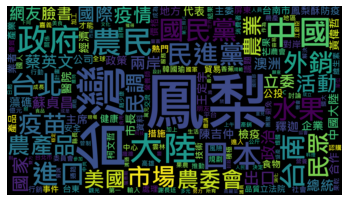

In [107]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

wordcloud = WordCloud(font_path='C:/Windows/Fonts/msjhbd.ttc', collocations=False, width=1920, height=1080).generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()